<font size="6" color = 'green'>KNN(K nearest neighbours) Algorithm</font>

The KNN algorithm is a <font size="3" color = 'red'>classification algorithm</font> in <font size="3" color = 'red'>Superviesed Machine Learning</font> which helps us to classify between any number of datasets defined at any parameters by calculating the majority of objects in a particular area...

In this particular code we are doing the simplest classification between the given dataset of Apples and Oranges that defines the sweetness and color(reddish) of the fruits...

If a new fruit is given at any random position(random sweetness and color) in space, then our algorithm will classify that weather the fruit is an Apple or Orange based on given data.

For more funtioning of knn algorithm refer: https://www.youtube.com/watch?v=nEivmykTijo
 
and https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Convert the given data into pandas DataFrame

dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

# print(dfx.head())

# Convert DataFrame into numpy ndarrays
X = dfx.values
Y = dfy.values

#print(X)

# Slicing the arrays as there are Serial number present in it
X = X[ : , 1: ]
Y = Y[ : , 1: ]
# print(X)

# Reshaping Y to a linear array.
Y = Y.reshape((-1,))

# print(X)
# print(Y)

print(X.shape)
print(Y.shape)

(399, 2)
(399,)


<font size="3" color = 'red'>DATA   VISUALISATION</font> 

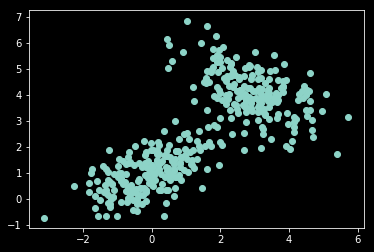

In [3]:
plt.style.use('dark_background')               # Styling of the graphical repsentation.
plt.scatter(X[:,0], X[:,1])                    # Creating a scatter plot of the sweetness and color of givrn fruit data.
plt.show()                                     # Calling the show funtion to show the plot.

<font size="3" color = 'red'>DATA CUSTOMIZATION</font>

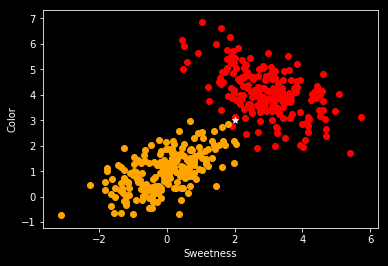

In [4]:
# Extracting the rows of X
m = X.shape[0]                   

# print(m)

# The array of Y is consisting of 0 and 1 where 0 stands for Apples and 1 for Oranges.
for i in range(m):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color = 'orange')
    if Y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color = 'red')
        

        
# Assigning a new fruit to dataset.
queryX = np.array([2, 3])                                            # 2 and 3 are the coordinates for unknown fruit
plt.scatter(queryX[0], queryX[1], marker = '*', color = 'white')
plt.xlabel("Sweetness")                                              # Labeling the Axes.
plt.ylabel("Color")
plt.show()

<font size="3" color = 'red'>DEFINING FUNCTIONS</font>

The basic approach of our algorithm will be that we will calculate the k(varies from 1 to n, where n is the number of total fruits) number of nearest distances from the new fruit that is given to us and then to calculate the maximum number of nearest
fruits.

We can say that   <font size="4" color = "green">KNN Algorithm is based on feature similarity: How closely out-of-sample features resemble our training set determines how we classify a given data point</font>

In [5]:
# Distance between 2 points
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X, Y, queryPoint, k = 5):
    vals = []                              # List of tuples.
    
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])         # Find distance of query points from other points.
        vals.append((d, Y[i]))
        
    vals = sorted(vals)                    # Sorting the list to get minimum distance(nearest neighbours) at starting indcies.
    vals = vals[ :k]                       # Slicing the list to k numbers.
    vals = np.array(vals)
    
    # np.unique() will filter out the unique values among k values, return_counts = True is done to get frequency.
    new_vals = np.unique(vals[:,1], return_counts = True)  
    
    # print(type(new_vals))
    # print(new_vals[1].argmax())
    
    prediction = new_vals[1].argmax()      # argmax() will return the maximum index of list.
    return prediction

In [6]:
get_prediction = knn(X, Y, queryX)
print(get_prediction)
if int(get_prediction) == 0:
    print("It's an Apple")
else:
    print("It's an Orange")

0
It's an Apple
